In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_theme(style="white")

In [26]:
with open(f"{PROJ_DIR}/scripts/model_rs/results_config.json", "r") as f:
    config = json.load(f)

id = config["id"]
hmap_labels = config["hmap_labels"]
hmap_labels_plotting = config["hmap_labels_plotting"]

In [27]:
edge_fc, node_fc, phase, fc_matrices, phase_maps = [], [], [], [], []
alpha_best, r_best = {}, {}
for hmap_label in hmap_labels:
    file = f"{PROJ_DIR}/results/model_rs/crossval/id-{id}/{hmap_label}_results.hdf5"

    with h5py.File(file, 'r') as f:
        edge_fc.append(np.array(f['edge_fc_test'][:]).flatten())
        node_fc.append(np.array(f['node_fc_test'][:]).flatten())
        phase.append(np.array(f['phase_test'][:]).flatten())

        best_comb = np.mean(np.array(f['best_combs'][:]), axis=0)
        alpha_best[hmap_label] = best_comb[0]
        r_best[hmap_label] = best_comb[1]

        fc_matrices.append(np.mean(np.array(f['fc_matrices'][:]), axis=2))
        phase_maps.append(np.mean(np.array(f['phase_maps'][:]), axis=1))

print(f"alpha_best: {alpha_best}")
print(f"r_best: {r_best}")
np.shape(fc_matrices), np.shape(phase_maps)

alpha_best: {'None': 0.0, 'myelinmap': 1.0399999999999991, 'thickness': -0.9600000000000003, 'synapticden': -0.47999999999999987, 'odi': 0.19999999999999937, 'ndi': 0.2400000000000002, 'SAaxis': -1.6400000000000001, 'genePC1': 0.8800000000000002, 'genel4PC1': -1.8, 'megtimescale': -1.04, 'eiratio2.2': 0.8799999999999993}
r_best: {'None': 28.9, 'myelinmap': 28.9, 'thickness': 28.9, 'synapticden': 28.9, 'odi': 28.9, 'ndi': 28.9, 'SAaxis': 28.9, 'genePC1': 28.9, 'genel4PC1': 28.9, 'megtimescale': 28.9, 'eiratio2.2': 28.9}


((11, 3619, 3619), (11, 3619))

## Evaluation metrics for each model

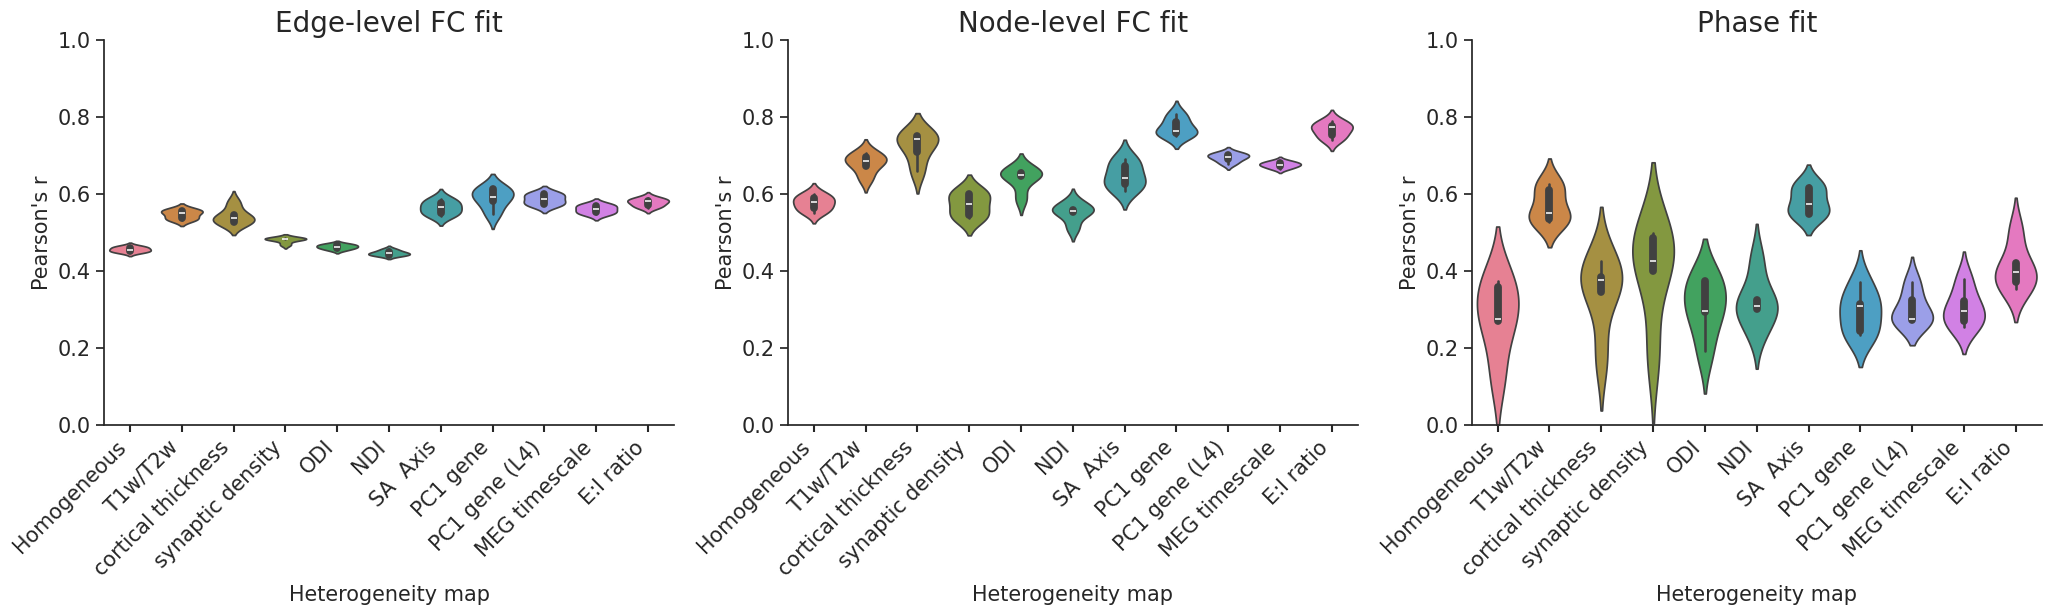

In [28]:
import matplotlib as mpl

# Set plotting defaults
fs_ax = 15
fs_title = 20
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

fig, axs = plt.subplots(1, 3, figsize=(25, 5))
axs = axs.flatten()

pnts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pnts) / 2, -np.cos(pnts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)

# Plot edge-level fc
# sns.stripplot(data=edge_fc, ax=axs[0], marker=open_circle, size=4, alpha=0.5, zorder=1, linewidth=0.3)
# sns.violinplot(data=edge_fc, ax=axs[0], density_norm="count", fill=False, linewidth=2, inner="box", inner_kws={"box_width": 5, "whis_width": 1, "color": "black"})
sns.violinplot(data=edge_fc, ax=axs[0], density_norm="count", inner="box")
axs[0].set_xticks(ticks=range(len(hmap_labels_plotting)))
axs[0].set_xticklabels(labels=hmap_labels_plotting, ha='right', fontsize=15)
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].tick_params(axis='y', labelsize=fs_ax)
axs[0].set_title("Edge-level FC fit", fontsize=fs_title)
axs[0].set_xlabel("Heterogeneity map", fontsize=fs_ax)
axs[0].set_ylabel("Pearson's r", fontsize=fs_ax)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].set_ylim(0, 1)
# for i, violin in enumerate(axs[0].collections[:len(hmap_labels)]):  # ::2 to skip the body parts, focusing on the borders
#     violin.set_edgecolor(sns.color_palette()[i])
#     violin.set_linewidth(2)

# Plot node-level fc
# sns.stripplot(data=node_fc, ax=axs[1], marker=open_circle, size=4, alpha=0.5, zorder=1, linewidth=0.3)
# sns.violinplot(data=node_fc, ax=axs[1], density_norm="count", fill=False, linewidth=2, inner="box", inner_kws={"box_width": 5, "whis_width": 1, "color": "black"})
sns.violinplot(data=node_fc, ax=axs[1], density_norm="count", inner="box")
axs[1].set_xticks(ticks=range(len(hmap_labels_plotting)), labels=hmap_labels_plotting, ha='right', fontsize=15)
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].tick_params(axis='y', labelsize=fs_ax)
axs[1].set_title("Node-level FC fit", fontsize=fs_title)
axs[1].set_xlabel("Heterogeneity map", fontsize=fs_ax)
axs[1].set_ylabel("Pearson's r", fontsize=fs_ax)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].set_ylim(0, 1)

# Plot phase
# sns.stripplot(data=phase, ax=axs[2], marker=open_circle, size=4, alpha=0.5, zorder=1, linewidth=0.3)
# sns.violinplot(data=phase, ax=axs[2], density_norm="count", fill=False, linewidth=2, inner="box", inner_kws={"box_width": 5, "whis_width": 1, "color": "black"})
sns.violinplot(data=phase, ax=axs[2], density_norm="count", inner="box")
axs[2].set_xticks(ticks=range(len(hmap_labels_plotting)), labels=hmap_labels_plotting, ha='right', fontsize=15)
axs[2].tick_params(axis='x', labelrotation=45)
axs[2].tick_params(axis='y', labelsize=fs_ax)
axs[2].set_title("Phase fit", fontsize=fs_title)
axs[2].set_xlabel("Heterogeneity map", fontsize=fs_ax)
axs[2].set_ylabel("Pearson's r", fontsize=fs_ax)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].set_ylim(0, 1)

plt.show()

## Alpha landscape

In [29]:
# Load homogeneous results
edge_fc_hom, node_fc_hom, phase_hom = [], [], []

file = f"{PROJ_DIR}/results/model_rs/crossval/id-{id}/None_results.hdf5"
with h5py.File(file, 'r') as f:
    edge_fc_hom.append(np.mean(np.array(f['edge_fc_test'][:]).flatten()))
    node_fc_hom.append(np.mean(np.array(f['node_fc_test'][:]).flatten()))
    phase_hom.append(np.mean(np.array(f['phase_test'][:]).flatten()))

In [30]:
edge_fc_land, node_fc_land, phase_land = [], [], []
best_alpha, alpha_vals = [], []
for i, hmap_label in enumerate(hmap_labels[1:]):
    file = f"{PROJ_DIR}/results/model_rs/crossval/id-{id}/{hmap_label}_results.hdf5"

    with h5py.File(file, 'r') as f:
        edge_fc_land.append(np.mean(f['edge_fc_train'][:], axis=0))
        node_fc_land.append(np.mean(f['node_fc_train'][:], axis=0))
        phase_land.append(np.mean(f['phase_train'][:], axis=0))

        alpha_vals.append(f['combs'][:, 0])
        best_alpha.append(np.mean(f['best_combs'], axis=0)[0])

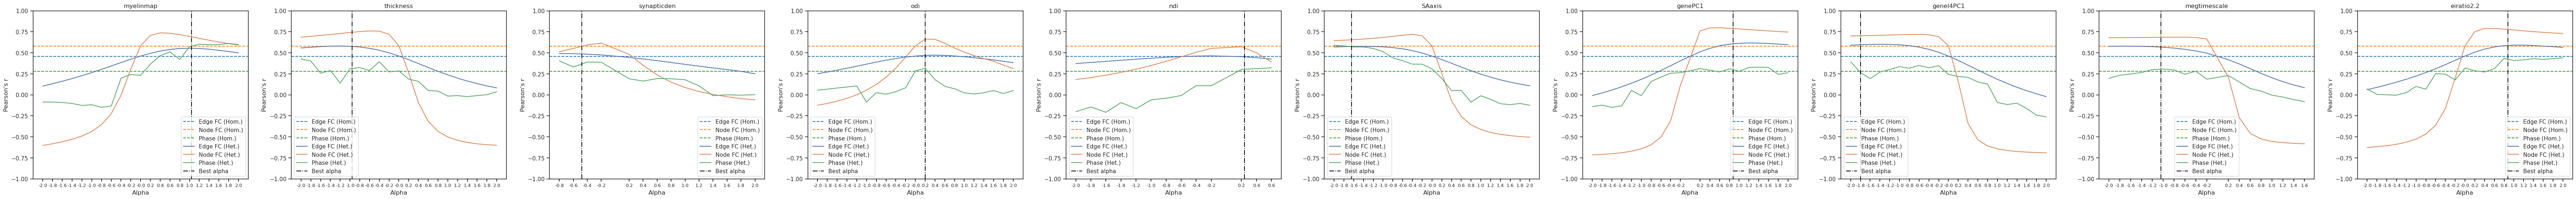

In [31]:
if len(hmap_labels) > 2:
    fig, axs  = plt.subplots(1, len(hmap_labels[1:]), figsize=(len(hmap_labels[1:])*9, 6))
    axs = axs.flatten()
else:
    fig, axs  = plt.subplots(1, 1, figsize=(9, 6))
    axs = [axs]

for i, hmap_label in enumerate(hmap_labels[1:]):
    # Plot homogeneous
    axs[i].axhline(edge_fc_hom, label="Edge FC (Hom.)", linestyle="--", color="tab:blue")
    axs[i].axhline(node_fc_hom, label="Node FC (Hom.)", linestyle="--", color="tab:orange")
    axs[i].axhline(phase_hom, label="Phase (Hom.)", linestyle="--", color="tab:green")

    # Plot heterogeneous
    axs[i].plot(alpha_vals[i], np.array(edge_fc_land[i]), label="Edge FC (Het.)")
    axs[i].plot(alpha_vals[i], np.array(node_fc_land[i]), label="Node FC (Het.)")
    axs[i].plot(alpha_vals[i], np.array(phase_land[i]), label="Phase (Het.)")

    # Plot best alpha
    axs[i].axvline(best_alpha[i], linestyle="-.", color="black", label="Best alpha")

    # Set labels
    axs[i].set_xticks(alpha_vals[i])
    axs[i].set_xticklabels([f"{x:.1f}" for x in alpha_vals[i]], fontsize=9)
    axs[i].set_title(hmap_labels[i+1])
    axs[i].set_xlabel("Alpha")
    axs[i].set_ylabel("Pearson's r")
    axs[i].set_ylim(-1, 1)
    axs[i].legend()

## FC matrices

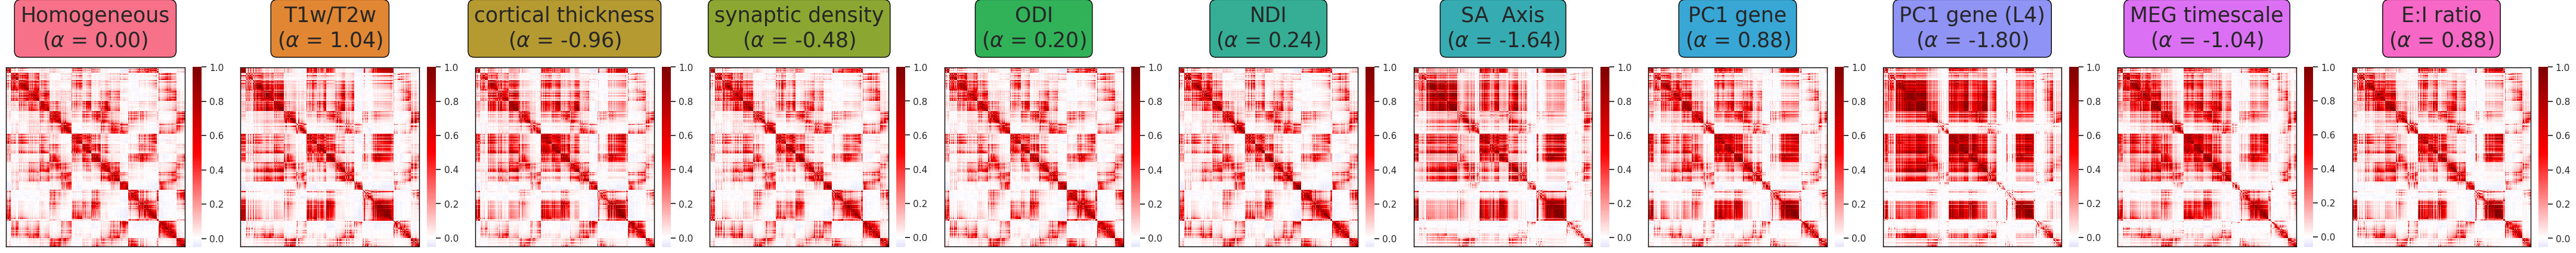

In [36]:
# Plot FC (averaged across test runs and splits) for each map
hmap_labels_plotting_alpha = [f"{label}\n($\\alpha$ = {alpha_best[hmap_label]:.2f})" for label, hmap_label in zip(hmap_labels_plotting, hmap_labels)]

fig, axs = plt.subplots(1, len(hmap_labels), figsize=(5*len(hmap_labels), 5))
for i, hmap_label in enumerate(hmap_labels):
    vmin = np.nanpercentile(fc_matrices[i], 5)
    vmax = np.nanpercentile(fc_matrices[i], 95)
    sns.heatmap(fc_matrices[i], ax=axs[i], cmap="seismic", center=0, square=True, cbar=True, xticklabels=[], yticklabels=[], cbar_kws=dict(fraction=0.046, pad=0.04))
    axs[i].set_title(hmap_labels_plotting_alpha[i], fontsize=25, bbox=dict(facecolor=sns.color_palette("husl", len(hmap_labels))[i], edgecolor='black', boxstyle='round,pad=0.3'), pad=25)
    # Set frame around heatmap
    for _, spine in axs[i].spines.items():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1)

## Phase maps

In [33]:
import nibabel as nib
from neuromaps.datasets import fetch_atlas
from heteromodes.utils import load_hmap, unmask
from heteromodes.solver import scale_hmap
from heteromodes.plotting import plot_brain

den = "4k"
fslr = fetch_atlas("fslr", den)
surf = fslr["inflated"][0]
medmask = h5py.File(f"{PROJ_DIR}/results/model_rs/crossval/id-{id}/None_results.hdf5", 'r')['medmask'][:]

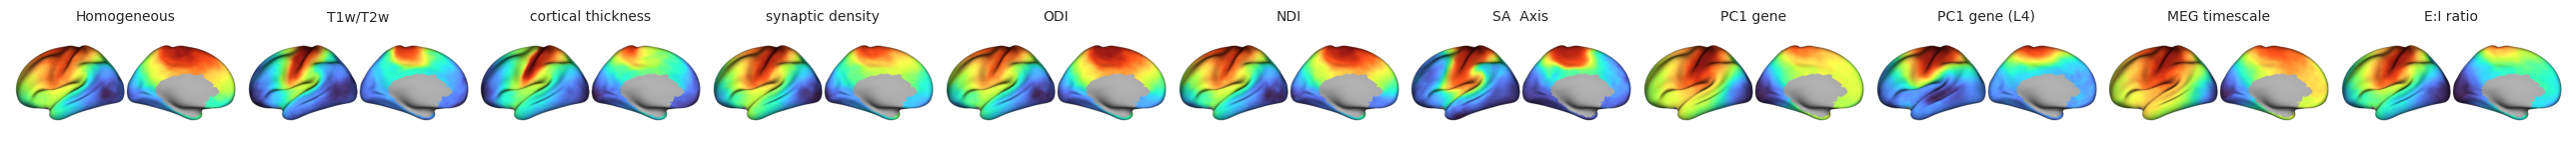

In [34]:
fig = plot_brain(surf, unmask(np.array(phase_maps).T, medmask), labels=hmap_labels_plotting, cbar=False,
                 cbar_kws=dict(fontsize=25), cmap="turbo")
plt.show()

## Wave speed maps


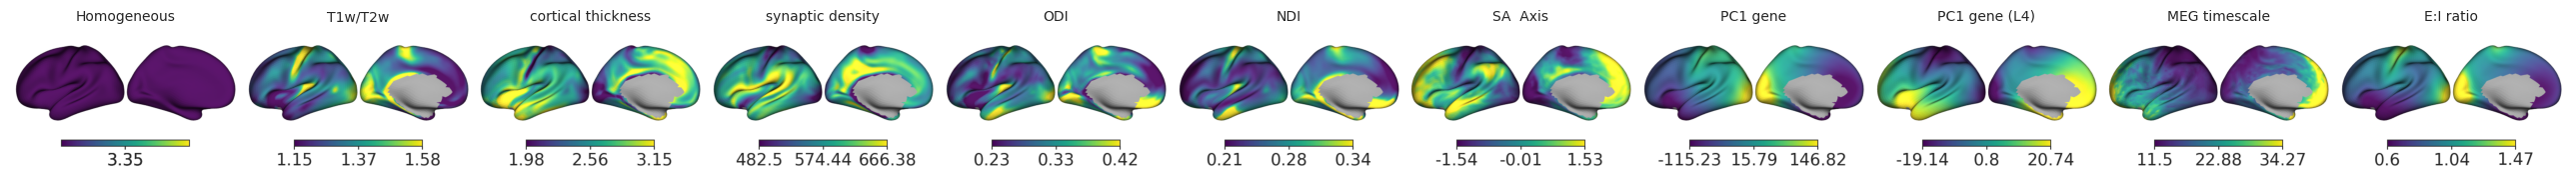

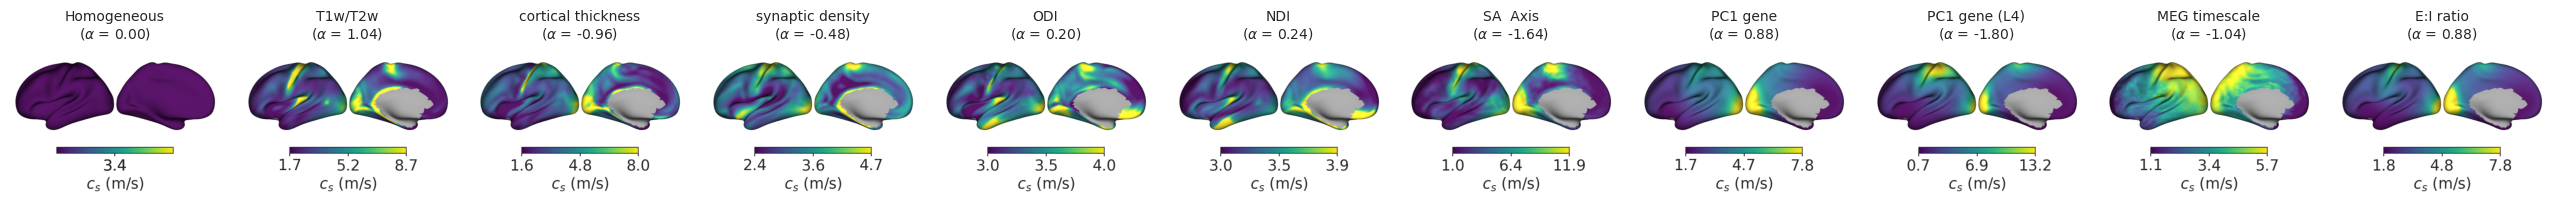

In [35]:
# Plot c maps with best alpha
hmap_data_orig, hmap_data_scaled = [], []
hmap_labels_plotting_alpha = [f"{label}\n($\\alpha$ = {alpha_best[hmap_label]:.2f})" for label, hmap_label in zip(hmap_labels_plotting, hmap_labels)]
for hmap_label in hmap_labels:
    if hmap_label == "None":
        hmap_data_orig.append(np.ones(len(medmask))*3.3524)
        hmap_data_scaled.append(np.ones(len(medmask))*3.3524)
        continue

    hmap = load_hmap(hmap_label, den)
    hmap_data_orig.append(unmask(hmap[medmask], medmask))

    hmap_scaled = scale_hmap(hmap[medmask], alpha=alpha_best[hmap_label])
    hmap_scaled = 3.3524 * np.sqrt(hmap_scaled) # Convert back to c_s
    hmap_data_scaled.append(unmask(hmap_scaled, medmask))
hmap_data_orig = np.array(hmap_data_orig).T
hmap_data_scaled = np.array(hmap_data_scaled).T

fig1 = plot_brain(surf, hmap_data_orig, labels=hmap_labels_plotting, clim_q=(5, 95), cbar=True,
                  cbar_kws=dict(fontsize=25))
fig2 = plot_brain(surf, hmap_data_scaled, labels=hmap_labels_plotting_alpha, clim_q=(5, 95), 
                  cbar=True, cbar_label="$c_s$ (m/s)", cbar_kws=dict(fontsize=25, decimals=1))